<H1>Multivariate regression</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
mypath = 'Cell_types.xlsx'
xls = pd.read_excel(mypath)

In [4]:
xls.head()

,CellID,Vrest,InputR,mbTau,SagRatio,MaxAPfreq,Animal Weight (g),Animal Age,Gender,AP peak (mv),AP_thr (mV)
0,16.08.30.0.5,-64.8039,123.611,21.766200,1.31594,5,23.1,8 weeks,male,NaN,NaN
1,16.08.31.0.6,-74.9081,152.837,23.242900,1.17876,17,24.6,8 weeks,male,NaN,NaN
2,16.08.31.1.2,-74.4443,221.895,27.983400,1.17550,7,24.6,8 weeks,male,NaN,NaN
3,16.09.01.0.1,-75.8549,294.484,31.245583,1.10705,29,26.0,8 weeks,female,NaN,NaN
4,16.09.01.0.2,-66.3612,271.674,34.679290,1.06450,25,26.0,8 weeks,female,NaN,NaN


In [5]:
xls.InputR

0    123.6110
1    152.8370
2    221.8950
3    294.4840
4    271.6740
5    137.2340
6     69.2104
7     97.5294
Name: InputR, dtype: float64

In [6]:
xls['Vrest'].mean()

-69.163162499999999

In [7]:
xls['Vrest'].unique() # get NumPy array

array([-64.8039, -74.9081, -74.4443, -75.8549, -66.3612, -68.7208,
       -66.2903, -61.9218])

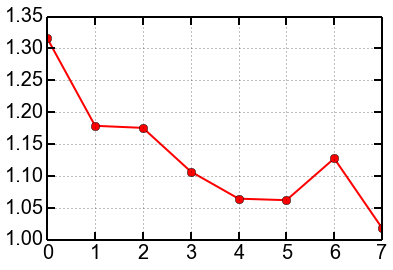

In [8]:
xls['SagRatio'].plot(marker='o', color='red'); # plots

Let's evaluate how much the membrane potential depends on Input resistance and 
membrane time constant and the sag ratio. We will create the following multivariate function:

$f(k;x) = k_0 + k_1x_1 + k_2x_2 + k_3x_3$

where $k$ is a vector or parameters (contants) and $x$ is a vector of independent variables (i.e $x_1$ is the input resistance $x_2$ is membrane time constant and $x_3$ the sag ratio)

In [9]:
x = xls[['InputR', 'SagRatio','mbTau']]
y = xls[['Vrest']]

In [10]:
# import standard regression models (sm)
import statsmodels.api as sm 

In [11]:
K = sm.add_constant(x) # k0, k1, k2 and k3...

In [12]:
# get estimation
est = sm.OLS(y, K).fit() # ordinary least square regression

In [14]:
est.summary() # need more data for kurtosis :)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Vrest   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2.611
Date:                Thu, 08 Sep 2016   Prob (F-statistic):              0.188
Time:                        07:30:25   Log-Likelihood:                -19.755
No. Observations:                   8   AIC:                             47.51
Df Residuals:                       4   BIC:                             47.83
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -65.9312     21.957     -3.003      0.040      -126.894    -4.969
InputR        -0.1582      0.069     -2.279      0.085        -0.351     0.034
SagRatio     -14.6860     16.502     -0.890      0.424       -60.503    31.131
mbTau          1.6515      0.924      1.788      0.148        -0.913     4.217
==============================================================================
Omnibus:                        2.275   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                0.762
Skew:                          -0.752   Prob(JB):                        0.683
Kurtosis:                       2.835   Cond. No.                     3.50e+03
==============================================================================

Warnings:
[1] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r_squared is not very large...  but coef gives us the values of $k_0$, $k_1$, $k_2$, and $k_3$ to plug into the equation. Based on the standard error <B>InputResistance</B> and <B>mbTau</B> are more important than SagRatio to determine the resting membrane potential.